# Capstone Project: Maximizing Taxi Tip Margins
## Exploratory Data Analysis

Randy Ngo, Hector San Andres Izquierdo, Jennifer Park, Angela Lin

## Getting Started
For this exploratory data analysis, the first step is to ensure the availability of all necessary data. The "New York City Taxi Trip" dataset provides a comprehensive collection of data related to yellow taxi trips in the New York City region. This dataset includes details such as pick-up and dropff dates/times, locations, trip distances, passenger counts, airport fees, fare amounts, tip amounts, total amounts, etc.

[New York City Taxi Trip Record Data](https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page)

## Data Dictionary Overview
Before cleaning and wrangling the data, let's familiarize ourselves with the data we just imported.

The New York City Taxi Trip Dataset serves as a comprehensive repository of data on yellow taxi trips across the city. It captures essential trip details across multiple fields, including ride characteristics, fare breakdowns, passenger behaviors, and spatial travel patterns.

Dataset Fields Overview:

*   tpep_pickup_datetime: Timestamp when the trip started.
*   tpep_dropoff_datetime: Timestamp when the trip ended.
*   passenger_count: Number of passengers.
*   trip_distance: Distance traveled in miles.
*   PULocationID: Pickup location ID referencing NYC taxi zones.
*   DOLocationID: Drop-off location ID referencing NYC taxi zones.
*   payment_type: Payment method used by the passenger.
*   fare_amount: Base fare for the trip.
*   extra: Additional charges.
*   tip_amount: Gratuity provided by the passenger.
*   tolls_amount: Toll charges incurred during the trip.
*   total_amount: Total cost of the trip.






In [143]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
from datetime import datetime

In [144]:
# dataframe
df2009 = pd.read_csv('credit2009.csv')
df2014 = pd.read_csv('credit2014.csv')
df2019 = pd.read_csv('credit2019.csv')
df2024 = pd.read_csv('credit2024.csv')

## Pre-Processing the Data
### Data Cleaning/Wrangling

In [145]:
# combining subset datasets
df_all = pd.concat([df2009, df2014, df2019, df2024], ignore_index=True)
print("Combined DataFrame info:")
print(df_all.info())

Combined DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4620922 entries, 0 to 4620921
Data columns (total 25 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   VendorID               object 
 2   tpep_pickup_datetime   object 
 3   tpep_dropoff_datetime  object 
 4   passenger_count        float64
 5   trip_distance          float64
 6   Start_Lon              float64
 7   Start_Lat              float64
 8   End_Lon                float64
 9   End_Lat                float64
 10  payment_type           int64  
 11  fare_amount            float64
 12  extra                  float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  hour                   int64  
 16  day_of_week            int64  
 17  month                  int64  
 18  year                   int64  
 19  RatecodeID             float64
 20  PULocationID           float64
 21  DOLocationID           float6

In [146]:
# drop null values
df_all = df_all.dropna()

In [147]:
# 'year' column
df2009['year'] = 2009
df2014['year'] = 2014
df2019['year'] = 2019
df2024['year'] = 2024

# concatenate
df_all = pd.concat([df2009, df2014, df2019, df2024], ignore_index=True)

In [148]:
df_all['tpep_pickup_datetime'] = pd.to_datetime(df_all['tpep_pickup_datetime'])

df_all['month'] = df_all['tpep_pickup_datetime'].dt.month
df_all['day_of_week'] = df_all['tpep_pickup_datetime'].dt.dayofweek
df_all['hour'] = df_all['tpep_pickup_datetime'].dt.hour

In [149]:
#df2024
def change_dates(df):
    df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
    df['month'] = df['tpep_pickup_datetime'].dt.month
    df['day_of_week'] = df['tpep_pickup_datetime'].dt.dayofweek
    df['hour'] = df['tpep_pickup_datetime'].dt.hour
    

    
#df2024['tpep_pickup_datetime'] = pd.to_datetime(df2024['tpep_pickup_datetime'])

#df2024['month'] = df2024['tpep_pickup_datetime'].dt.month
#df2024['day_of_week'] = df2024['tpep_pickup_datetime'].dt.dayofweek
#df2024['hour'] = df2024['tpep_pickup_datetime'].dt.hour

In [150]:
change_dates(df2009)
change_dates(df2014)
change_dates(df2019)
change_dates(df2024)

In [193]:
df2009 = df2009.dropna()
df2014 = df2014.dropna()
df2019 = df2019.dropna()
df2024 = df2024.dropna()

# Machine Learning

## Random Forest Regressor

In [169]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = df_all.drop(['tip_amount', 'VendorID'],axis=1)
X = X.drop(['tpep_pickup_datetime'],axis=1)
X = X.drop(['tpep_dropoff_datetime'],axis=1)
X = X.iloc[:,1:]
y = df_all['tip_amount']

In [170]:
X2009 = X[X['year'] == 2009]
X2014 = X[X['year'] == 2014]
X2019 = X[X['year'] == 2019]
X2024 = X[X['year'] == 2024]
y2009 = df_all[df_all['year'] == 2009]
y2009 = y2009['tip_amount']
y2014 = df_all[df_all['year'] == 2014]
y2014 = y2014['tip_amount']
y2019 = df_all[df_all['year'] == 2019]
y2019 = y2019['tip_amount']
y2024 = df_all[df_all['year'] == 2024]
y2024 = y2024['tip_amount']

In [171]:
X = X.drop(['year'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [172]:
from sklearn.model_selection import RandomizedSearchCV

params = {
     'max_features': ['auto', 'sqrt', 'log2'],
     'min_samples_leaf': [1, 2, 3, 4],
     'min_samples_split': [1, 2, 3, 4],
     'n_estimators': [i for i in range(0, 101, 20)],
     'n_jobs': [-1]
}
rfr = RandomForestRegressor()
model = RandomizedSearchCV(rfr, params, verbose = 1)
model.fit(X_train, y_train)
print(model.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\hsana\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
29 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hsana\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hsana\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\hsana\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\hsana\anaconda3\Lib\site-packages\

{'n_jobs': -1, 'n_estimators': 20, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_features': 'sqrt'}


In [173]:
#best model: {'n_jobs': -1, 'n_estimators': 20, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_features': 'sqrt'}
rf = RandomForestRegressor(max_features='sqrt', min_samples_leaf = 3,
    min_samples_split = 4, n_estimators = 20, n_jobs = -1)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Random Forest Model Performance:")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

Random Forest Model Performance:
RMSE: 1.75
R² Score: 0.5932


In [174]:
#On training data for all
y_pred_train = rf.predict(X_train)

mse = mean_squared_error(y_train, y_pred_train)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, y_pred_train)

print(f"Random Forest Model Performance:")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

Random Forest Model Performance:
RMSE: 1.32
R² Score: 0.7646


In [175]:
#On 2009 data
X2009 = X2009.drop(['year'], axis = 1)
X_train2009, X_test2009, y_train2009, y_test2009 = train_test_split(X2009, y2009, test_size=0.1, random_state=42)

y_pred2009 = rf.predict(X_test2009)
mse = mean_squared_error(y_test2009, y_pred2009)
rmse = np.sqrt(mse)
r2 = r2_score(y_test2009, y_pred2009)

print(f"Random Forest Model Performance:")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

Random Forest Model Performance:
RMSE: 1.07
R² Score: 0.7124


In [176]:
#On 2014 data
X2014 = X2014.drop(['year'], axis = 1)
X_train2014, X_test2014, y_train2014, y_test2014 = train_test_split(X2014, y2014, test_size=0.1, random_state=42)

y_pred2014 = rf.predict(X_test2014)
mse = mean_squared_error(y_test2014, y_pred2014)
rmse = np.sqrt(mse)
r2 = r2_score(y_test2014, y_pred2014)

print(f"Random Forest Model Performance:")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

Random Forest Model Performance:
RMSE: 1.40
R² Score: 0.7162


In [177]:
#On 2019 data
X2019 = X2019.drop(['year'], axis = 1)
X_train2019, X_test2019, y_train2019, y_test2019 = train_test_split(X2019, y2019, test_size=0.1, random_state=42)

y_pred2019 = rf.predict(X_test2019)
mse = mean_squared_error(y_test2019, y_pred2019)
rmse = np.sqrt(mse)
r2 = r2_score(y_test2019, y_pred2019)

print(f"Random Forest Model Performance:")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

Random Forest Model Performance:
RMSE: 1.61
R² Score: 0.7180


In [178]:
#On 2024 data
X2024 = X2024.drop(['year'], axis = 1)
X_train2024, X_test2024, y_train2024, y_test2024 = train_test_split(X2024, y2024, test_size=0.1, random_state=42)

y_pred2024 = rf.predict(X_test2024)
mse = mean_squared_error(y_test2024, y_pred2024)
rmse = np.sqrt(mse)
r2 = r2_score(y_test2024, y_pred2024)

print(f"Random Forest Model Performance:")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

Random Forest Model Performance:
RMSE: 2.03
R² Score: 0.7529


In [179]:
importance = rf.feature_importances_

In [180]:
df_importance = pd.DataFrame({'Features': X_train.columns, 'Importance': importance})
df_importance = df_importance.sort_values(by = ['Importance'], ascending = False)
df_importance.reset_index(drop=True, inplace=True)
df_importance

,Features,Importance
0,fare_amount,0.302282
1,trip_distance,0.266523
2,tolls_amount,0.104905
3,RatecodeID,0.064178
4,DOLocationID,0.029026
5,PULocationID,0.028512
6,hour,0.025307
7,improvement_surcharge,0.024629
8,End_Lon,0.023747
9,month,0.023389


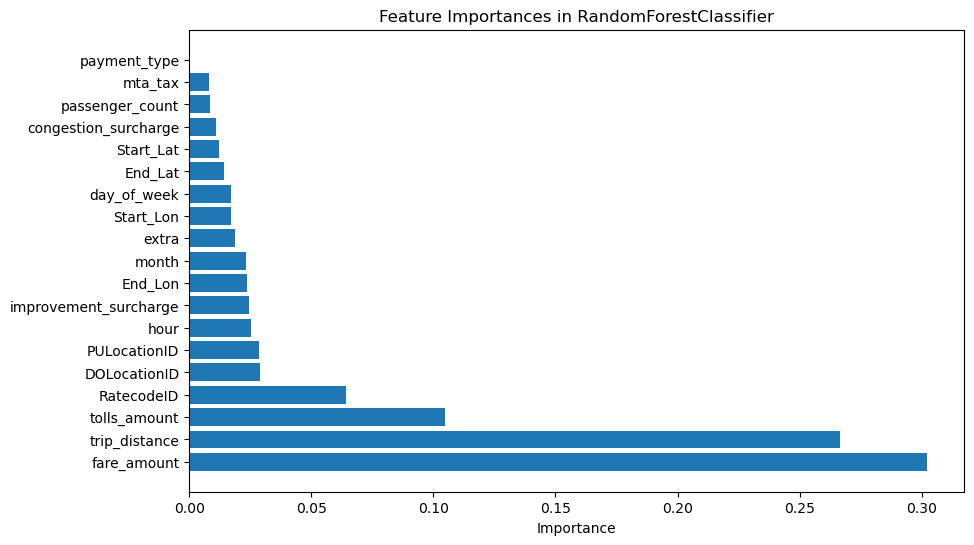

In [181]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(df_importance['Features'], df_importance['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances in RandomForestClassifier')
plt.show()

In [182]:
#By Boroughs
import geopandas as gpd
zones = gpd.read_file('taxi_zones.shp')
boroughs = zones[['LocationID', 'borough']]
new_all = pd.merge(df_all, boroughs, how='left', left_on='PULocationID', right_on='LocationID')

In [184]:
testdf2024 = pd.DataFrame(X_test2024['PULocationID'])

In [185]:
testdf2024['predicted'] = y_pred2024
testdf2024['actual'] = y_test2024

In [186]:
testdf2024

,PULocationID,predicted,actual
4455551,141.0,0.000000,0.00
4296216,116.0,7.571031,3.00
4465223,48.0,4.373211,6.65
4584435,237.0,2.143355,2.24
4232263,100.0,2.843499,5.00
...,...,...,...
4398410,211.0,2.142886,2.00
4325069,68.0,3.367533,3.72
4544994,113.0,2.262264,2.52
4230261,48.0,3.617575,3.86


In [187]:
new_2024 = pd.merge(testdf2024, boroughs, how='left', left_on='PULocationID', right_on='LocationID')

predicted_2024 = new_2024[['predicted', 'borough']]
predicted_2024 = predicted_2024.groupby(['borough']).mean()

actual_2024 = new_2024[['actual', 'borough']]
actual_2024 = actual_2024.groupby(['borough']).mean()

In [188]:
predicted_2024

,predicted
borough,
Bronx,0.635359
Brooklyn,1.633103
EWR,9.698911
Manhattan,3.646205
Queens,11.116871
Staten Island,17.460192


In [189]:
actual_2024

,actual
borough,
Bronx,0.554149
Brooklyn,1.439559
EWR,4.560000
Manhattan,3.658223
Queens,11.089764
Staten Island,29.000000


In [197]:
bound = gpd.read_file('nybb.shp')

bound['predict'] = [17.460192, 0.635359, 11.116871,  3.646205, 1.633103]
bound['actual'] = [29.000000, 0.554149, 11.089764, 3.658223, 1.439559]

In [198]:
bound

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry,predict,actual
0,5,Staten Island,325910.306061,1.623619e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227....",17.460192,29.000000
1,2,Bronx,463180.579257,1.187175e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278...",0.635359,0.554149
2,4,Queens,887913.109699,3.041418e+09,"MULTIPOLYGON (((1032452.015 154469.237, 103245...",11.116871,11.089764
3,1,Manhattan,360037.634379,6.366460e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940....",3.646205,3.658223
4,3,Brooklyn,728148.996409,1.934142e+09,"MULTIPOLYGON (((1022227.320 152028.146, 102207...",1.633103,1.439559


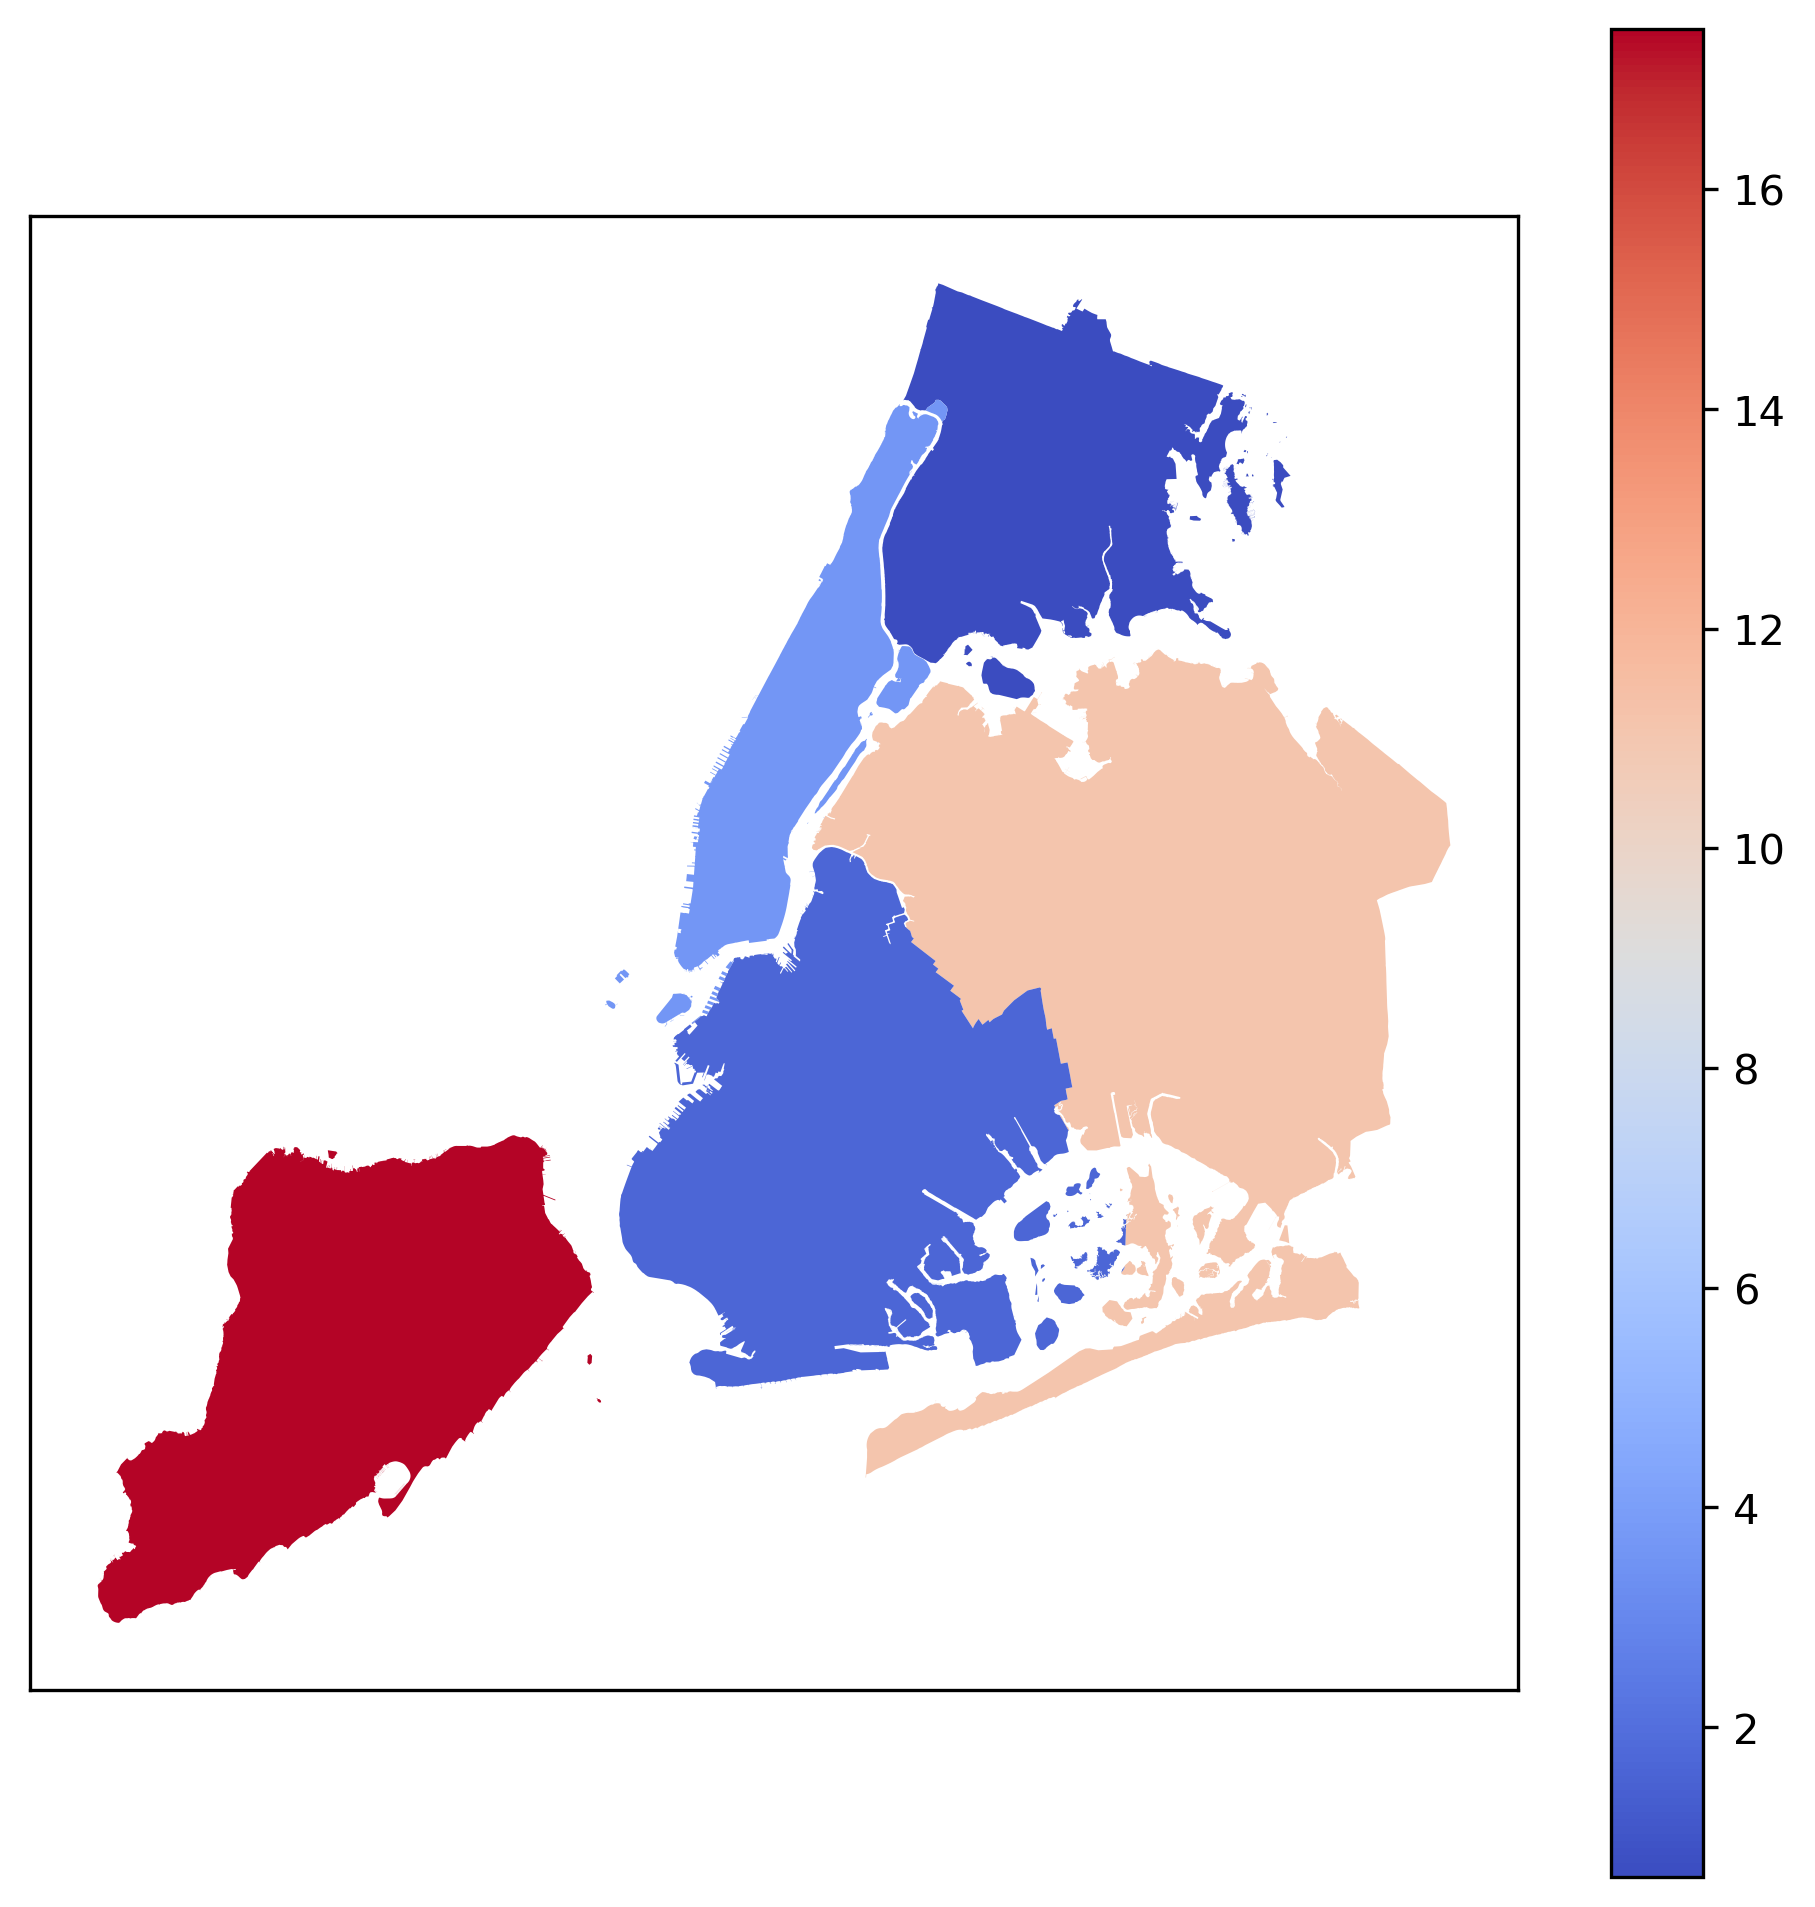

In [201]:
#borough by predicted
fig, ax1 = plt.subplots(1, 1, figsize=(8, 8), dpi=300)
bound.plot(column='predict', ax=ax1, legend=True, cmap='coolwarm');
ax1.set_xticks([]);
ax1.set_yticks([]);

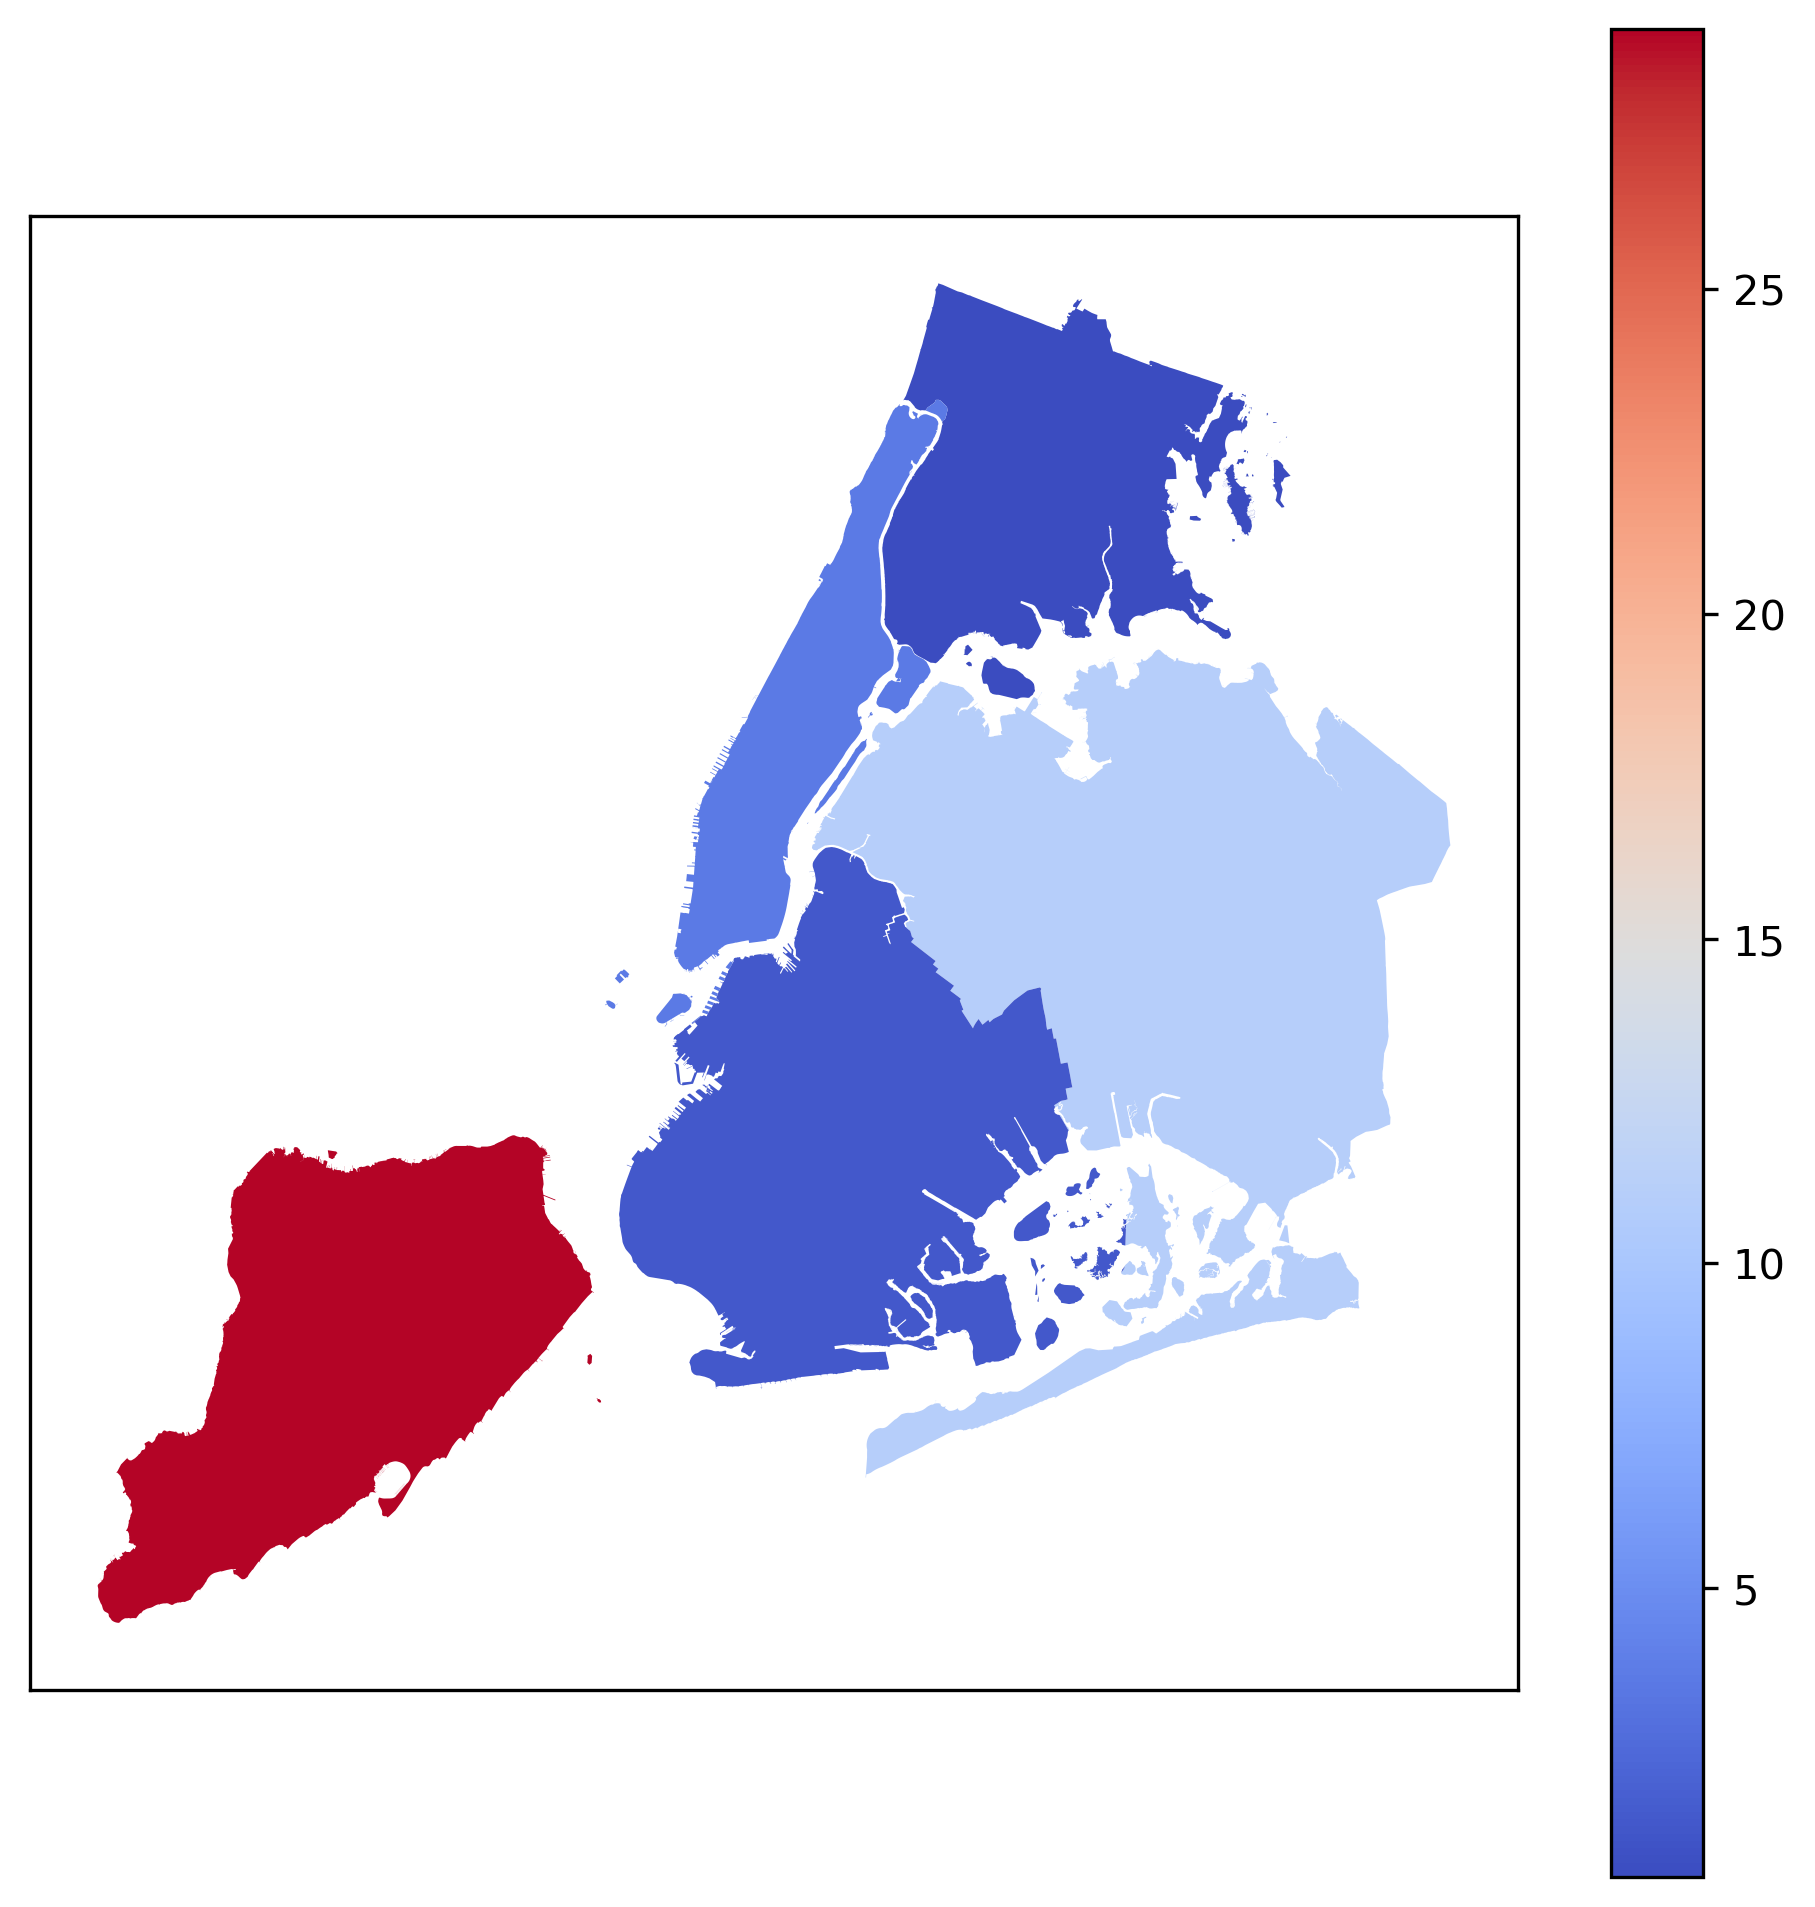

In [200]:
#borough by actual 
fig, ax1 = plt.subplots(1, 1, figsize=(8, 8), dpi=300)
bound.plot(column='actual', ax=ax1, legend=True, cmap='coolwarm');
ax1.set_xticks([]);
ax1.set_yticks([]);